In [1]:
#Importo la librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.model_selection import train_test_split 
import sklearn

In [2]:
#importo el dataset y hago revision de los datos

df = pd.read_csv("titles_filtrado.csv")



In [3]:
# Drop de columnas innecesarias
df.drop("id", inplace=True, axis=1)

df.drop("imdb_id", inplace=True, axis=1)

# Limpio `genres` y `production_countries`, devuelta tomando el primer elemento de de la lista que cada valor retenga
def parse_list(row):
    parsed = str(row)[1:-1].split(",")
    for i in range(len(parsed)):
        parsed[i] = parsed[i].strip()[1:-1]
        
    return parsed[0] if parsed[0] != '' else 'N/A'

df['genres_parsed'] = df['genres'].map(parse_list)
df['prod_countries_parsed'] = df['production_countries'].map(parse_list)
df[['genres_parsed', 'prod_countries_parsed']]

,genres_parsed,prod_countries_parsed
0,documentation,US
1,drama,US
2,drama,US
3,fantasy,GB
4,war,GB
...,...,...
5845,romance,NG
5846,drama,N/A
5847,comedy,CO
5848,N/A,US


In [4]:
# Añado la columna 'is_movie'
df['is_movie'] = df.type.map(lambda x: 0 if x == 'SHOW' else 1)

In [5]:
# Drop de columnas innecesarias
df.drop("title", axis=1, inplace=True)
df.drop("description", axis=1, inplace=True)

# Relleno valores nulos
df['age_certification'].fillna("N/A", inplace=True)
df['seasons'].fillna(0.0, inplace=True)
df['tmdb_popularity'].fillna(df['tmdb_popularity'].mean(), inplace=True)
df.dropna(subset='imdb_votes',inplace=True)




In [6]:

indexNames = df[df['imdb_votes'] <= 5e+02].index

df.drop(indexNames , inplace=True)

df.round({'imdb_score': 0})


,Unnamed: 0,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genres_parsed,prod_countries_parsed,is_movie
1,1,MOVIE,1976,R,114,"['drama', 'crime']",['US'],0.0,8.0,808582.0,40.965,8.2,drama,US,1
2,2,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,8.0,107673.0,10.010,7.3,drama,US,1
3,3,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.0,534486.0,15.461,7.8,fantasy,GB,1
4,4,MOVIE,1967,N/A,150,"['war', 'action']","['GB', 'US']",0.0,8.0,72662.0,20.398,7.6,war,GB,1
5,5,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,9.0,73424.0,17.617,8.3,comedy,GB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,5821,MOVIE,2021,N/A,148,"['thriller', 'action', 'drama']",['IN'],0.0,5.0,1497.0,1.978,5.3,thriller,IN,1
5822,5822,MOVIE,2021,N/A,92,['drama'],['SA'],0.0,7.0,1007.0,1.971,7.5,drama,SA,1
5827,5827,MOVIE,2021,N/A,95,"['comedy', 'drama', 'family']",['ZA'],0.0,7.0,1164.0,3.827,6.0,comedy,ZA,1
5831,5831,SHOW,2021,TV-MA,37,"['drama', 'romance']",['IN'],1.0,5.0,738.0,1.400,5.5,drama,IN,0


In [7]:
df.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie
count,4044.000000,4044.000000,4044.000000,4044.000000,4044.000000,4.044000e+03,4044.000000,4044.000000,4044.000000
mean,2743.315282,2016.191395,81.871167,0.852374,6.622354,3.095735e+04,28.078071,6.845772,0.646142
std,1653.121195,6.999556,38.387617,2.147819,1.120700,1.091818e+05,90.917627,0.964889,0.478225
min,1.000000,1954.000000,0.000000,0.000000,1.700000,5.010000e+02,0.600000,1.000000,0.000000
25%,1317.750000,2016.000000,48.000000,0.000000,5.900000,1.550750e+03,4.554500,6.200000,0.000000
50%,2597.500000,2018.000000,90.000000,0.000000,6.700000,4.212500e+03,9.704000,6.900000,1.000000
75%,4056.500000,2020.000000,107.000000,1.000000,7.400000,1.654650e+04,21.859500,7.500000,1.000000
max,5832.000000,2022.000000,224.000000,42.000000,9.500000,2.294231e+06,2274.044000,10.000000,1.000000


In [8]:
# Trasnfroma las variables categoricas en numericas
all_data = pd.get_dummies(df[[  'age_certification',
                                'genres_parsed', 
                                'prod_countries_parsed', 
                                'imdb_votes', 
                                'seasons', 
                                'is_movie',
                                'release_year',
                                'runtime']])



In [9]:
X = all_data.copy()
y = df['imdb_score']

In [10]:
#Creo las variables
from sklearn.model_selection import train_test_split, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
#Hacemos nuestras predicciones
y_lin = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.24210056841941052

In [13]:
#Este es un metodo para ver el error en el modelo

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def score_dataset(X_train, X_valid, y_train, y_valid, model=RandomForestRegressor(n_estimators=1000, random_state=0)):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return {"mean_squared_error": mean_squared_error(y_valid, preds), "mean_absolute_error": mean_absolute_error(y_valid, preds), "mean_absolute_percentage_error": mean_absolute_percentage_error(y_test, preds)}

In [14]:
scores = -1 * cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=LinearRegression())

{'mean_squared_error': 0.9161599666170869,
 'mean_absolute_error': 0.7342913944840473,
 'mean_absolute_percentage_error': 0.12449197180264536}

In [16]:
from sklearn.linear_model import BayesianRidge


bayreg = BayesianRidge(n_iter=10000)
bayreg.fit(X_train, y_train)
y_bay = bayreg.predict(X_test)
bayreg.score(X_test,y_test)

0.259551372887284

In [17]:
scores = -1 * cross_val_score(bayreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=BayesianRidge())

{'mean_squared_error': 0.8950651778198635,
 'mean_absolute_error': 0.7212053920351909,
 'mean_absolute_percentage_error': 0.12263989278203388}

In [18]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

orthreg = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())
orthreg.fit(X_train, y_train)
y_orth = orthreg.predict(X_test)
orthreg.score(X_test,y_test)

C:\Users\ezesp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.22046024759440674

In [19]:
scores = -1 * cross_val_score(orthreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=OrthogonalMatchingPursuit())

C:\Users\ezesp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\ezesp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize

{'mean_squared_error': 0.942319104331798,
 'mean_absolute_error': 0.7412205500083924,
 'mean_absolute_percentage_error': 0.12589418799349789}

In [21]:
from sklearn.linear_model import Lasso


lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_lasso = lassoreg.predict(X_test)
lassoreg.score(X_test,y_test)

0.055207532251516755

In [22]:
scores = -1 * cross_val_score(lassoreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=Lasso())

{'mean_squared_error': 1.1420790142398807,
 'mean_absolute_error': 0.8360087462496609,
 'mean_absolute_percentage_error': 0.14185863458651826}

In [23]:
from sklearn.svm import SVR

SVR_regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=1,gamma=1e-2, kernel='rbf'))
SVR_regr.fit(X_train, y_train)
y_svr=SVR_regr.predict(X_test)
SVR_regr.score(X_test,y_test)


0.26078957193297403

In [24]:
scores = -1 * cross_val_score(SVR_regr, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=SVR())

{'mean_squared_error': 1.1727136202044617,
 'mean_absolute_error': 0.846074501781089,
 'mean_absolute_percentage_error': 0.14621696349452218}

In [25]:
df_predicciones = pd.DataFrame({'Actual': y_test, 
                                'Predicted_Lin': y_lin, 
                                'Predicted_Bayesian': y_bay,
                                'Predicted_OrthMatch': y_orth,
                                'Predicted_Lasso': y_lasso,
                                'Predicted_SVR': y_svr})
df_predicciones

,Actual,Predicted_Lin,Predicted_Bayesian,Predicted_OrthMatch,Predicted_Lasso,Predicted_SVR
5171,7.3,7.303706,7.228842,6.789835,6.635547,6.953978
1421,5.9,5.745168,5.790236,5.855103,6.507247,5.634498
645,8.4,9.768358,9.748791,9.802426,10.088083,7.989520
1892,7.0,6.738085,6.733671,6.908979,6.926358,6.979867
157,6.8,7.241817,7.233665,7.391145,6.927538,7.255552
...,...,...,...,...,...,...
2448,7.4,7.736243,7.691402,7.749711,6.705494,7.601997
699,6.0,6.738298,6.733816,6.813381,6.592641,6.622466
1247,7.2,5.960936,5.967309,6.182586,6.594956,5.826676
3316,7.4,6.915831,6.887095,6.889994,6.432979,7.010966


In [27]:
df_predicciones['Promedio']= (  df_predicciones['Predicted_Lin'] + 
                                df_predicciones['Predicted_Bayesian'] +
                                df_predicciones['Predicted_OrthMatch'] +
                                df_predicciones['Predicted_Lasso'] +
                                df_predicciones['Predicted_SVR']) /5

df_predicciones

,Actual,Predicted_Lin,Predicted_Bayesian,Predicted_OrthMatch,Predicted_Lasso,Predicted_SVR,Promedio
5171,7.3,7.303706,7.228842,6.789835,6.635547,6.953978,6.982381
1421,5.9,5.745168,5.790236,5.855103,6.507247,5.634498,5.906450
645,8.4,9.768358,9.748791,9.802426,10.088083,7.989520,9.479436
1892,7.0,6.738085,6.733671,6.908979,6.926358,6.979867,6.857392
157,6.8,7.241817,7.233665,7.391145,6.927538,7.255552,7.209943
...,...,...,...,...,...,...,...
2448,7.4,7.736243,7.691402,7.749711,6.705494,7.601997,7.496969
699,6.0,6.738298,6.733816,6.813381,6.592641,6.622466,6.700120
1247,7.2,5.960936,5.967309,6.182586,6.594956,5.826676,6.106493
3316,7.4,6.915831,6.887095,6.889994,6.432979,7.010966,6.827373


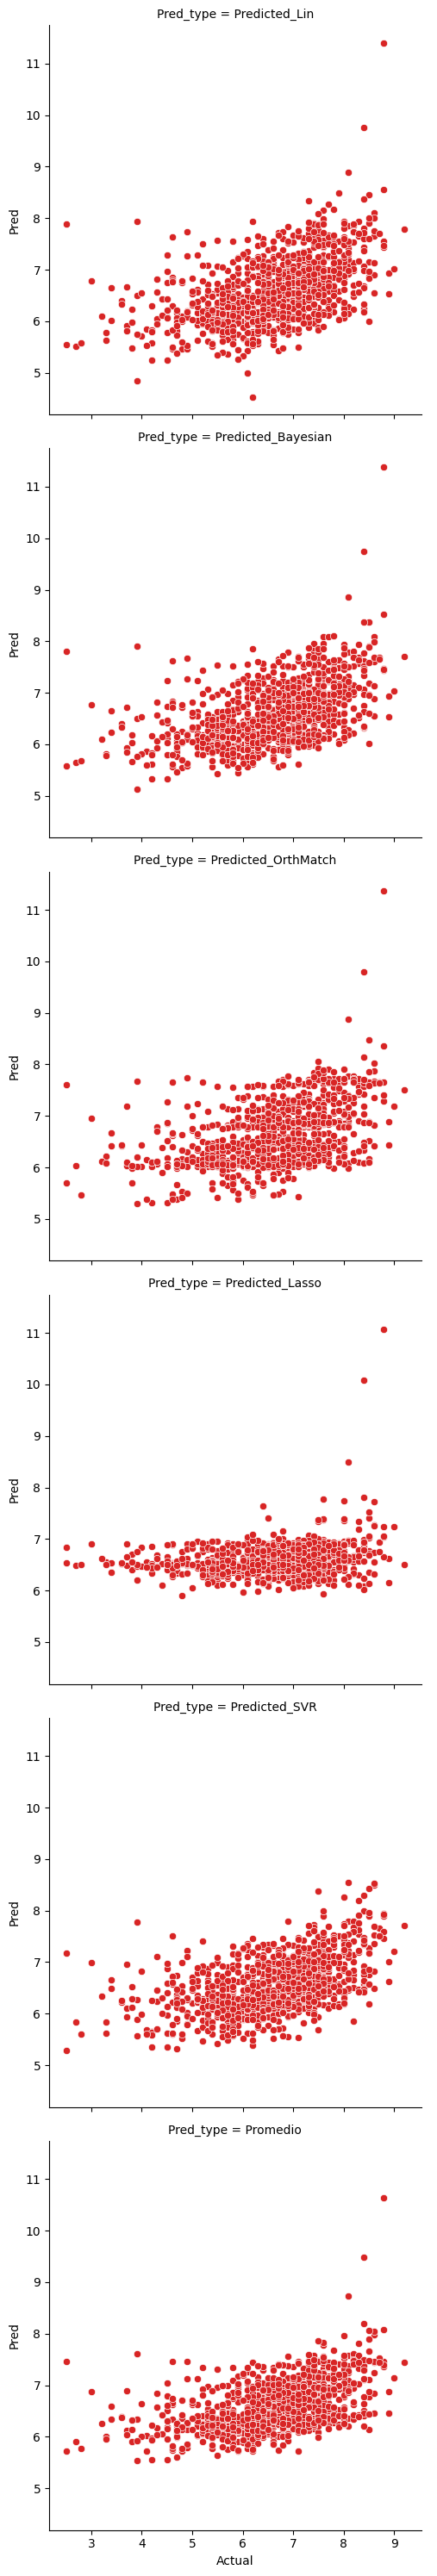

In [45]:
df_to_scatter = df_predicciones.melt('Actual',var_name='Pred_type', value_name='Pred')
colors = ["#d82525", "#464646"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.FacetGrid(df_to_scatter, row="Pred_type", height=5, palette="red")
g.map(sns.scatterplot, "Actual", "Pred")
g.add_legend()


In [50]:
df_predicciones['diferencia'] = (df_predicciones["Actual"] - df_predicciones["Promedio"])*100/2
print(
df_predicciones['diferencia'].median(),
df_predicciones['diferencia'].mean()
)

5.327760351905564 -0.2020798482870527
